# (Dataset Exploration Title)
## by (Abdelrahman Saleh)

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [76]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [77]:
bike = pd.read_csv('ford go bike.csv')
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [78]:
bike.shape

(183412, 16)

In [79]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

**Note : These columns ( start_time, end_time, member_birth_year ) need to convert to datetime, <br>
and These columns ( member_birth_year, member_gender ) have null values**                             

In [80]:
bike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

**Note : The number of null values**

In [81]:
bike_clean = bike.copy()

In [82]:
bike_clean.dropna(axis= 0, inplace= True)
bike_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

**Note : The null values have been droped**

In [83]:
bike_clean['start_time'] = pd.to_datetime(bike_clean['start_time'])
bike_clean['end_time'] = pd.to_datetime(bike_clean['end_time'])
bike_clean['member_birth_year'] = bike_clean['member_birth_year'].astype('int')
#bike_clean['member_birth_year'] = pd. DatetimeIndex(bike_clean['member_birth_year']). year

**Note : changed the columns Dtype**

In [84]:
bike_clean['member_gender'].unique()

array(['Male', 'Other', 'Female'], dtype=object)

In [85]:
bike_clean = bike_clean.query("member_gender != 'Other'")

**Note : Remove 'Other' gender from member_gender column**

In [86]:
bike_clean.drop(['start_station_id', 'end_station_id', 'bike_id', 'start_station_latitude', 'start_station_longitude',
                'end_station_latitude', 'end_station_longitude'], axis= 1, inplace=True) 

**Note : Remove unnecessary columns** 

In [87]:
bike_clean['week_days'] = bike_clean.start_time.dt.day_name()
bike_clean['start_hour'] = bike_clean.start_time.dt.hour
bike_clean['end_hour'] = bike_clean.end_time.dt.hour
bike_clean['age'] = 2021 - bike_clean['member_birth_year']
bike_clean = bike_clean.query('age <= 75' )
bike_clean['duration_min'] = bike_clean['duration_sec'] / 60 
bike_clean['duration_min'] = round(bike_clean['duration_min'], 2)  

**Note : Add columns for better analysis**

In [88]:
bike_clean.head(3)

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,week_days,start_hour,end_hour,age,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984,Male,No,Thursday,17,8,37,869.75
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972,Male,No,Thursday,12,5,49,1030.90
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974,Male,Yes,Thursday,23,0,47,26.42


In [89]:
bike_clean.shape

(170963, 14)

### What is the structure of your dataset?

> After Cleaning the data, it has now 171305 raws & 14 columns contain (duration_sec, start_time, end_time, start_station_name,	end_station_name, user_type, member_birth_year,	member_gender)	

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in bike start and end time to know the time which bikes are most used, the characteristics of the bikers like age and gender, the duration of the trips    

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> start time and end time will help to know the most frequent time, member gender and member birth year will help to know the characteristics of bikers, start and end station will help to know the destination 

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### The Distribution of User  Type

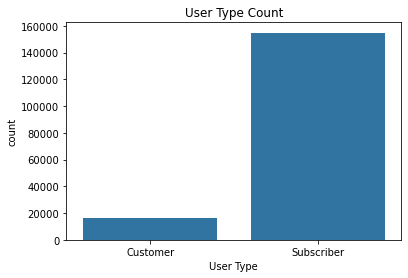

In [90]:
sb.countplot(data = bike_clean, x= 'user_type', color = sb.color_palette()[0])
plt.title('User Type Count')
plt.xlabel('User Type');

**Note : most of the bikers are subscribers**

### The Distribution of Gender

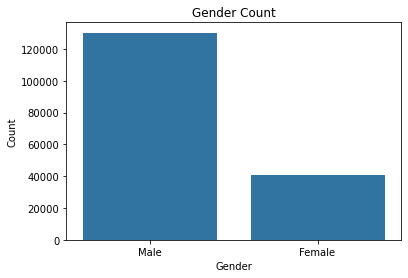

In [91]:
sb.countplot(data= bike_clean, x= 'member_gender', color= sb.color_palette()[0])
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count');

**Note : The majority of bike users are Male**

### The Distribution of Time in Days

In [92]:
# Arrange the days of the week

ordered = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday' ]
weekdays = pd.api.types.CategoricalDtype(ordered= True, categories = ordered)
bike_clean['week_days'] = bike_clean['week_days'].astype(weekdays)

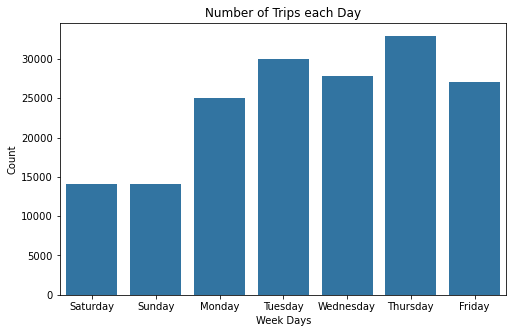

In [93]:
plt.figure(figsize= [8,5])
sb.countplot(data= bike_clean, x= 'week_days', color= sb.color_palette()[0]);\
plt.title('Number of Trips each Day')
plt.xlabel('Week Days')
plt.ylabel('Count');

**Note : Thursday has the most trips followed by Tuesday**

### The Distribution of Start Time  (Hour)

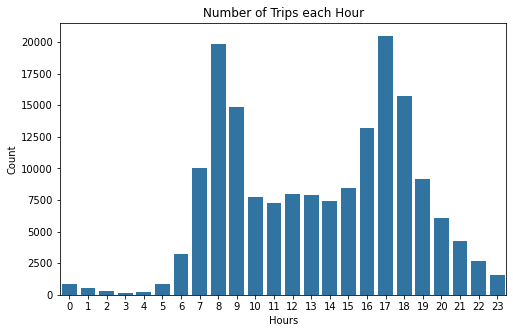

In [94]:
plt.figure(figsize= [8,5])
sb.countplot(data= bike_clean, x= 'start_hour', color= sb.color_palette()[0]);\
plt.title('Number of Trips each Hour')
plt.xlabel('Hours')
plt.ylabel('Count');

**Note : Most of the trips take time at 8:00 AM and 9:00 AM , and at 5:00 PM and 6:00 PM. <br> 
so it might be related to work, going to work with a bike.**

### The Distribution of Duration in  (Minutes)

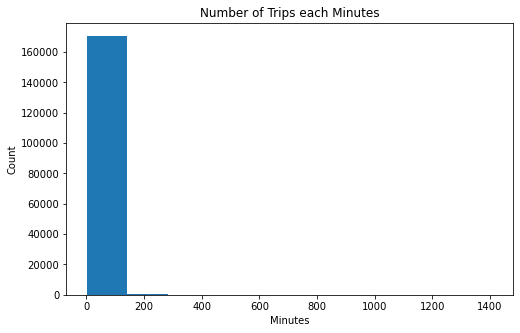

In [95]:
plt.figure(figsize= [8,5])
plt.hist(data= bike_clean, x= 'duration_min', color= sb.color_palette()[0])
plt.title('Number of Trips each Minutes')
plt.xlabel('Minutes')
plt.ylabel('Count');

In [96]:
bike_clean.duration_min.describe()

count    170963.000000
mean         11.634578
std          26.309914
min           1.020000
25%           5.380000
50%           8.500000
75%          13.120000
max        1409.130000
Name: duration_min, dtype: float64

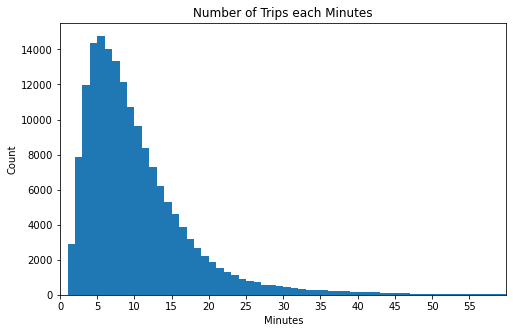

In [97]:
plt.figure(figsize= [8,5])

#Set bins from 0 to 60 moving by 1 for minutes
bins = np.arange(0, 60 + 1, 1)
ticks = np.arange(0, 60, 5)
plt.hist(data= bike_clean, x= 'duration_min', color= sb.color_palette()[0], bins = bins)
plt.xticks(ticks, ticks)
plt.title('Number of Trips each Minutes')
plt.xlabel('Minutes')
plt.ylabel('Count')

#Set a limit for minutes from 0 to 60
plt.xlim(0, 60);

**Note : Most of the Trips were less than 1 hour, between 4 to 10 minutes**

### The Distribution of Ages 

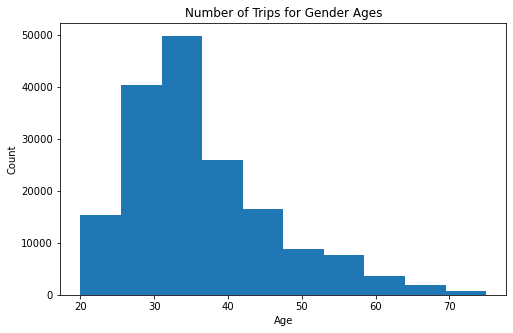

In [98]:
plt.figure(figsize= [8,5])
plt.hist(data= bike_clean, x= 'age', color= sb.color_palette()[0])
plt.title('Number of Trips for Gender Ages')
plt.xlabel('Age')
plt.ylabel('Count');

In [99]:
bike_clean.age.describe()

count    170963.000000
mean         36.051485
std           9.799231
min          20.000000
25%          29.000000
50%          34.000000
75%          41.000000
max          75.000000
Name: age, dtype: float64

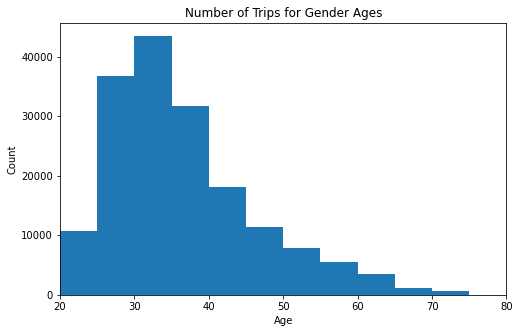

In [100]:
plt.figure(figsize= [8,5])

#Set bins from 20 to 143 moving by 5 for Age
bins = np.arange(20, 143 +5, 5)
plt.hist(data= bike_clean, x= 'age', color= sb.color_palette()[0], bins = bins)

#Set a limit for Age from 20 to 80
plt.xlim(20, 80)
plt.title('Number of Trips for Gender Ages')
plt.xlabel('Age')
plt.ylabel('Count');

**Noted : the most of users age between 25 - 40 years old**

### Top 10 Start & End Staions 

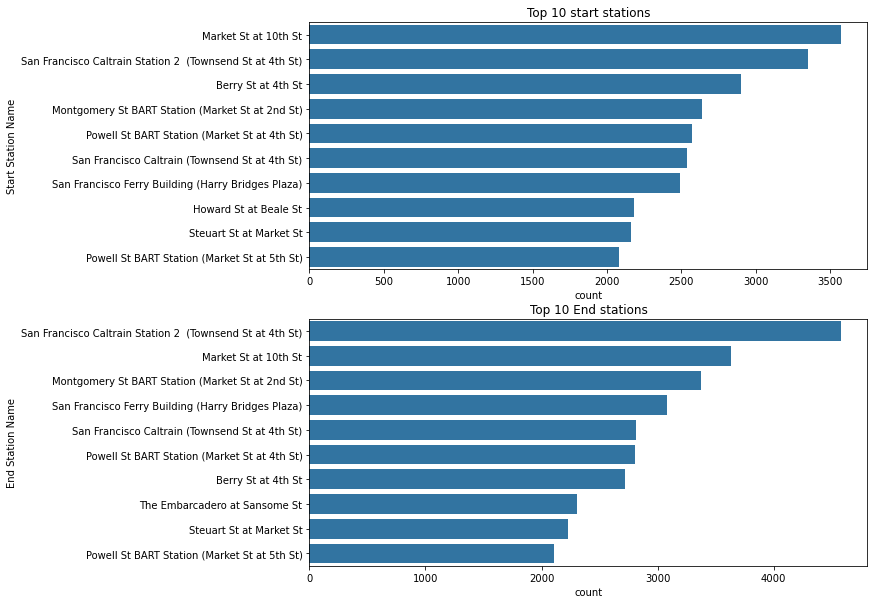

In [101]:
plt.figure(figsize=[10,10])

# Ploting Top 10 start stations
plt.subplot(2,1,1)
order = bike_clean.start_station_name.value_counts().index[:10]
sb.countplot(data = bike_clean, y= 'start_station_name', order = order, color= sb.color_palette()[0])
plt.title('Top 10 start stations')
plt.ylabel('Start Station Name')

# Ploting Top 10 End stations
plt.subplot(2,1,2)
order = bike_clean.end_station_name.value_counts().index[:10]
sb.countplot(data = bike_clean, y= 'end_station_name', order = order, color= sb.color_palette()[0])
plt.title('Top 10 End stations')
plt.ylabel('End Station Name');

**Note : The most popular station in both starting and ending stations are (Market St at 10th St & San Francisco caltrain station 2).**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Most of the bike users are subscribers and the majority of them are males, the hours' distribution shows that most of the trips start time is at 8:00 AM and 9:00 AM and 5:00P M 6:00 PM and most of the trips take place at the working day more than weekends (Saturday & Sunday). most of the age of the rider is between 25 to 40 years old, and most of the duration time in minutes is between 4 and 10 minutes

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I've added columns for starting hours shows the starting hours of the trips, and weekdays to show which day the trip started, and I added duration in the minutes' column, and created an age column that shows each biker ages.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [102]:
bike_clean.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,week_days,start_hour,end_hour,age,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984,Male,No,Thursday,17,8,37,869.75
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972,Male,No,Thursday,12,5,49,1030.90
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974,Male,Yes,Thursday,23,0,47,26.42
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,1959,Male,No,Thursday,23,0,62,29.88
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,Palm St at Willow St,San Jose Diridon Station,Subscriber,1983,Female,No,Thursday,23,0,38,19.12


### Relationship between User Type and Genders

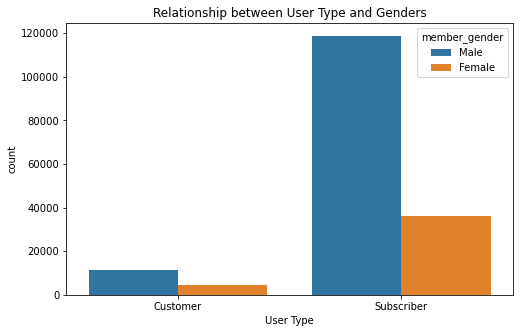

In [103]:
plt.figure(figsize= [8,5])
sb.countplot(data= bike_clean, x= 'user_type', hue= 'member_gender')
plt.title('Relationship between User Type and Genders')
plt.xlabel('User Type');

**Note : Most of the customer and subscribers are Male**

### Relationship between weekdays and start hours

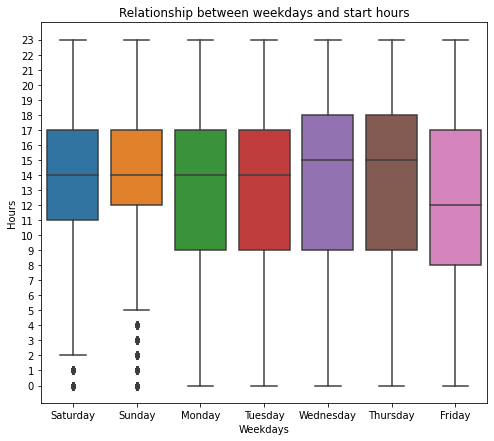

In [104]:
plt.figure(figsize= [8,7])
sb.boxplot(data= bike_clean, x= 'week_days', y= 'start_hour')

#Set bins from 0 to 23 moving by 1 for hours
bins = np.arange(bike_clean.start_hour.min(), bike_clean.start_hour.max()+1, 1)
plt.yticks(bins)
plt.title('Relationship between weekdays and start hours')
plt.xlabel('Weekdays')
plt.ylabel('Hours');

**Note: This relation shows that in the working days starting hours it between 8:00 AM and 9:00 AM and
between 5:00 PM and 6:00 Pm, differ from weekend days**

### Relationship between Gender and Duration Minutes

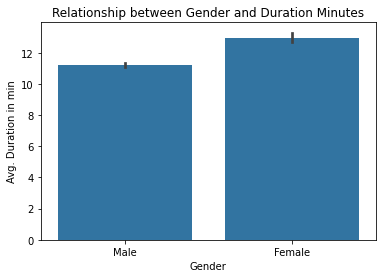

In [105]:
plt.figure(figsize=[6,4])
sb.barplot(data= bike_clean, x= 'member_gender', y= 'duration_min', color= sb.color_palette()[0])
plt.title('Relationship between Gender and Duration Minutes')
plt.xlabel('Gender')
plt.ylabel('Avg. Duration in min');

**Note: ride duration is higher for Females than Males** 

### Relationship between User Type and Duration Time in Minutes

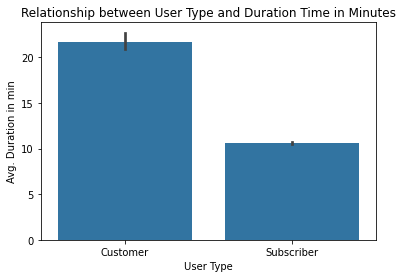

In [106]:
plt.figure(figsize=[6,4])
sb.barplot(data= bike_clean, x= 'user_type', y= 'duration_min', color= sb.color_palette()[0])
plt.title('Relationship between User Type and Duration Time in Minutes')
plt.xlabel('User Type')
plt.ylabel('Avg. Duration in min');

**Note: customers have longer duration than subscribers** 

### Relationship between User Type and Age

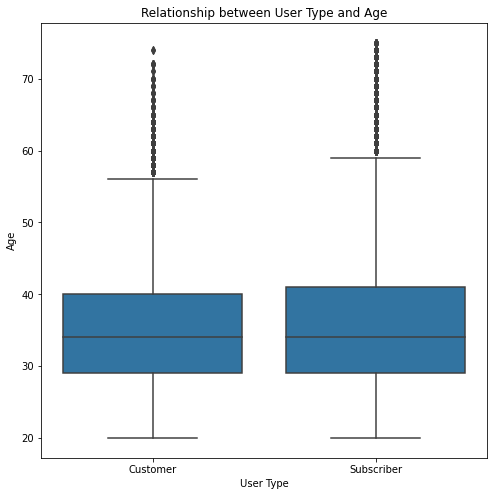

In [107]:
plt.figure(figsize=[8,8])
sb.boxplot(data= bike_clean, x= 'user_type', y= 'age', color= sb.color_palette()[0])
plt.title('Relationship between User Type and Age')
plt.xlabel('User Type')
plt.ylabel('Age');

**Note: customer and subscribers ages are close, same median but the subscribers are slightly older**

### Relationship between ages and Duration Minutes

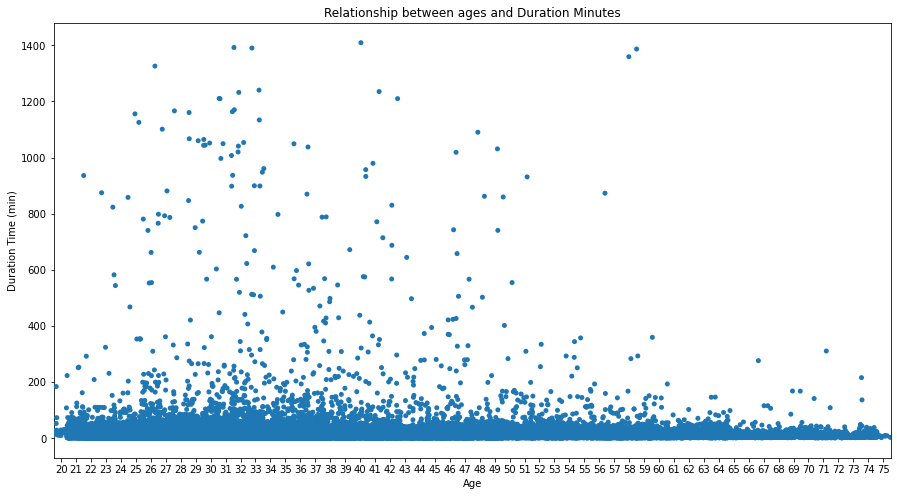

In [108]:
plt.figure(figsize=[15,8])
color = sb.color_palette()[0]
sb.stripplot(data = bike_clean, x= 'age', y= 'duration_min',color = color, jitter=0.6)
plt.title('Relationship between ages and Duration Minutes')
plt.xlabel('Age')
plt.ylabel('Duration Time (min)');

**Note: the scatter plot shows that the most users that have long duration time are between 20 and 50. The younger bikers tend to ride for higher duration so it's a negative relation** 



### Relationship between gender and age

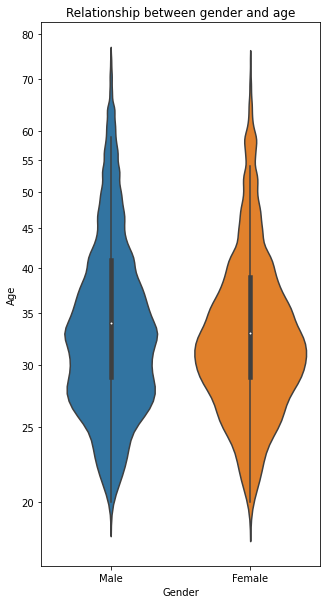

In [109]:
plt.figure(figsize=[5,10])
sb.violinplot(data = bike_clean, x= 'member_gender', y= 'age')

#Set log transformation for age
plt.yscale('log')
plt.yticks([20, 25, 30, 35, 40, 45, 50, 55, 60, 70, 80], [20, 25, 30, 35, 40, 45, 50, 55, 60, 70, 80])
plt.title('Relationship between gender and age')
plt.xlabel('Gender')
plt.ylabel('Age');

**Note: The male users are older than the female users. The female age distribution is close to male age distribution, but male have more values above 55 years.**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> > The duration time of the trips is longer among the young users than old users. This also can be the reason why the duration of the trips is longer for the female riders since the female users are younger than the males' users. This relation between weekdays and hours shows that in the working days starting hours is between 8:00 AM and 9:00 AM and between 5:00 PM and 6:00 Pm, differ from weekend days so users use the bikes to go to work and most of the users are subscribers and most of them are males.
customer and subscribers ages are close, same median but the subscribers are slightly older, and customers have a longer duration than subscribers and that's because the majority is riding for fun not going to work



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> yes it's interesting to see that customers have longer duration trips in average than the subscribers while the median age is the same.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Relationship between Trip Duration, Age and User Types 

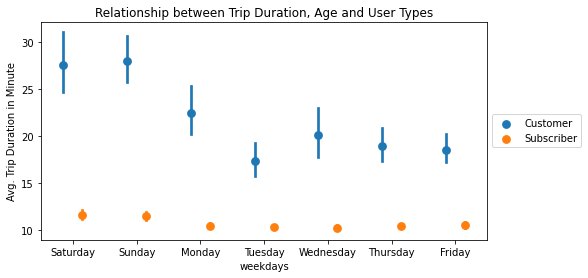

In [110]:
plt.figure(figsize=[8,4])
sb.pointplot(data = bike_clean, x = 'week_days', y = 'duration_min', hue = 'user_type', linestyles= " ", dodge= 0.3)
plt.legend(bbox_to_anchor=(1, .6))
plt.title('Relationship between Trip Duration, Age and User Types')
plt.xlabel('weekdays')
plt.ylabel('Avg. Trip Duration in Minute');

**Note: The plot shows that subscribers ride much shorter trips than customers on each day.** 

### Relationship between Start hours, Weekdays and User Types 

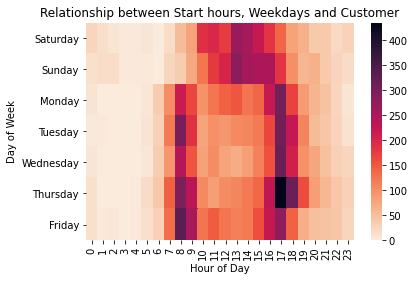

In [111]:
#Relationship between Start hours, Weekdays and customers
customers = bike_clean.query('user_type == "Customer"')
ct_counts = customers.groupby(['week_days', 'start_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='week_days', columns='start_hour', values='count')
sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('Relationship between Start hours, Weekdays and Customer')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week');

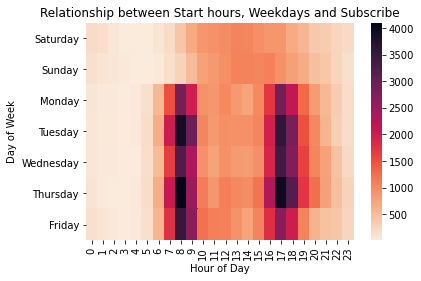

In [112]:
#Relationship between Start hours, Weekdays and Subscriber
Subscriber = bike_clean.query('user_type == "Subscriber"')
ct_counts = Subscriber.groupby(['week_days', 'start_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='week_days', columns='start_hour', values='count')
sb.heatmap(ct_counts, cmap='rocket_r')
plt.title('Relationship between Start hours, Weekdays and Subscribe')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week');

**Note: The heatmaps shows that Subscribers use the system more on work days from Monday to Friday but customers ride a lot on weekends(saturday & sunday). most of trips started between 8:00 & 9:00 Am and between 5:00 & 6:00 Pm on work days for subscribers when used for work.**

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The multivariate exploration shows that subscribers use bikes primarily for going to work, unlike customers, they're taking advantage of the bike sharing system quite differently from the subscribers, heavily over weekends, maybe for sport or fun purpose.

